AUTO DESCRIPTION

In [43]:
!pip install requests

import requests
from IPython.display import display, Image
import io
from PIL import Image as PILImage
import ipywidgets as widgets


In [131]:
uploader = widgets.FileUpload(accept='.jpg', multiple=True)



In [87]:
# 🔑 Replace with your Azure credentials
VISION_KEY = 'your_key'
VISION_ENDPOINT = 'your_endpoint'  # e.g. https://<region>.api.cognitive.microsoft.com


In [88]:
vision_url = VISION_ENDPOINT + "/vision/v3.2/analyze"
params = {'visualFeatures': 'Description,Tags'}

def analyze_image(img_bytes):
    headers = {
        'Ocp-Apim-Subscription-Key': VISION_KEY,
        'Content-Type': 'application/octet-stream'
    }
    response = requests.post(vision_url, headers=headers, params=params, data=img_bytes)
    response.raise_for_status()
    return response.json()


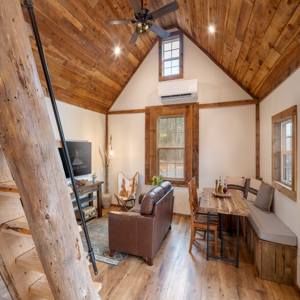


📷 2.jpg
📝 a living room with a wood staircase
🏷️ Tags: indoor, interior design, ceiling, floor, table
--------------------------------------------------


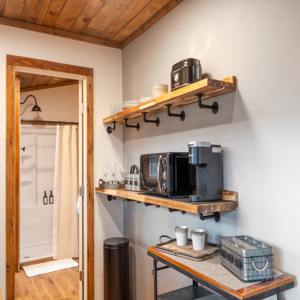


📷 3.jpg
📝 a kitchen with a shelf and a shelf with pots and pans
🏷️ Tags: wall, indoor, home appliance, cabinetry, countertop
--------------------------------------------------


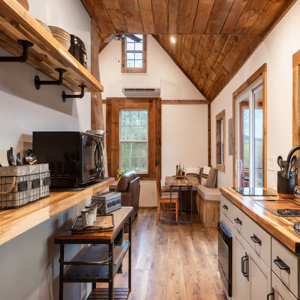


📷 4.jpg
📝 a kitchen with wooden floors
🏷️ Tags: indoor, cabinetry, countertop, wall, furniture
--------------------------------------------------


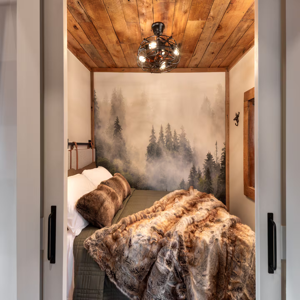


📷 5.jpg
📝 a bedroom with a large painting
🏷️ Tags: wall, indoor, interior design, bedding, furniture
--------------------------------------------------


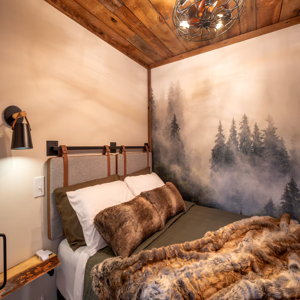


📷 6.jpg
📝 a bedroom with a large painting
🏷️ Tags: indoor, wall, interior design, pillow, furniture
--------------------------------------------------


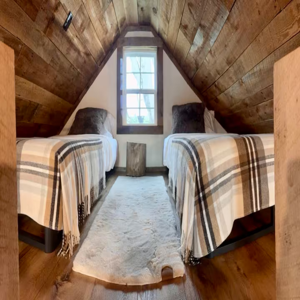


📷 7.jpg
📝 a couple of beds in a room
🏷️ Tags: indoor, wall, interior design, bed, floor
--------------------------------------------------


In [89]:
captions = []
tag_set = set()

if uploader.value:
    for fname, file_info in uploader.value.items():
        if fname.lower().endswith('.jpg'):
            img_data = file_info['content']
            pil_img = PILImage.open(io.BytesIO(img_data))
            display(pil_img.resize((300, 300)))

            result = analyze_image(img_data)
            caption = result.get("description", {}).get("captions", [{}])[0].get("text", "No description.")
            tags = [tag['name'] for tag in result.get("tags", [])[:5]]

            captions.append(caption)
            tag_set.update(tags)

            print(f"\n📷 {fname}")
            print(f"📝 {caption}")
            print(f"🏷️ Tags: {', '.join(tags)}")
            print("-" * 50)

    # Combine descriptions into house-level overview
    raw_description = " ".join(captions)
    tag_summary = ", ".join(tag_set)


In [47]:
pip install azure-ai-inference

In [90]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import UserMessage
from azure.core.credentials import AzureKeyCredential

# Set your personal access token here
os.environ["model_key"] = "your_token"  # replace with your actual token

# Azure inference endpoint and model
endpoint = "your_endpoint"
model_name = "Phi-4-multimodal-instruct"
token = os.environ["model_key"]

# Create Azure AI client
client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

# Define function to generate real estate description
def get_house_description(text, tags):
    prompt = f"""
You are an AI assistant for generating professional real estate descriptions.
Here is the rough description of the house's rooms and features: "{text}"
Features and tags associated with the property: {tags}

Generate a concise, informative, and appealing property description for online listings. The tone should be professional and suitable for marketing platforms like Zillow, Realtor.com, and Redfin.
"""

    response = client.complete(
        messages=[
            UserMessage(content=prompt),
        ],
        temperature=0.7,
        top_p=1.0,
        max_tokens=500,
        model=model_name
    )

    return response.choices[0].message.content


In [91]:
# Get Phi-4-multimodal-instruct
try:
    house_summary = get_house_description(raw_description, tag_summary)
    print("\n🏡 Final House Description (GPT):\n")
    print(house_summary)
except Exception as e:
    print("\n💬 Final House Description (Basic):\n")
    print(f"This house features: {raw_description}")



🏡 Final House Description (GPT):

**Property Description: Charming Family Home with Modern Amenities**

Step into this beautifully designed family home featuring a spacious living room with a classic wood staircase, providing a warm and inviting atmosphere. The heart of the home boasts a contemporary kitchen, complete with elegant cabinetry and a dedicated countertop. The kitchen also includes a cozy nook with shelves, perfect for storing pots and pans. The floors are adorned with warm wooden finishes, adding to the home's inviting charm.

Spanning across two elegantly appointed bedrooms, each adorned with a large, captivating painting, this property offers the ultimate retreat. The rooms are equipped with comfortable beds, ensuring restful nights for all occupants. The thoughtfully designed furniture, including a stylish table, complements the overall interior design, making every space feel both functional and beautiful.

As you explore further, you'll find the home is fitted with e